In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [2]:
X = []
y = []

In [3]:
for i in os.listdir("RnE/src/2nd/faces"):
    if '_questions' in i:
        y.append(1.)
    else:
        y.append(0.)
    img = cv2.imread(f"RnE/src/2nd/faces/{i}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (50, 50))
    X.append(img)

In [4]:
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(219, 50, 50, 3)
(219,)


In [5]:
train_img, test_img, train_labels, test_labels = train_test_split(X, y, test_size=0.2, shuffle=True)

In [6]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(8, 3, activation='relu', padding='same', input_shape=(50, 50, 3)))
    model.add(keras.layers.MaxPool2D((2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    return model

In [7]:
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

2022-12-21 17:35:41.742811: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 17:35:41.763943: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 17:35:41.764049: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 17:35:41.764570: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

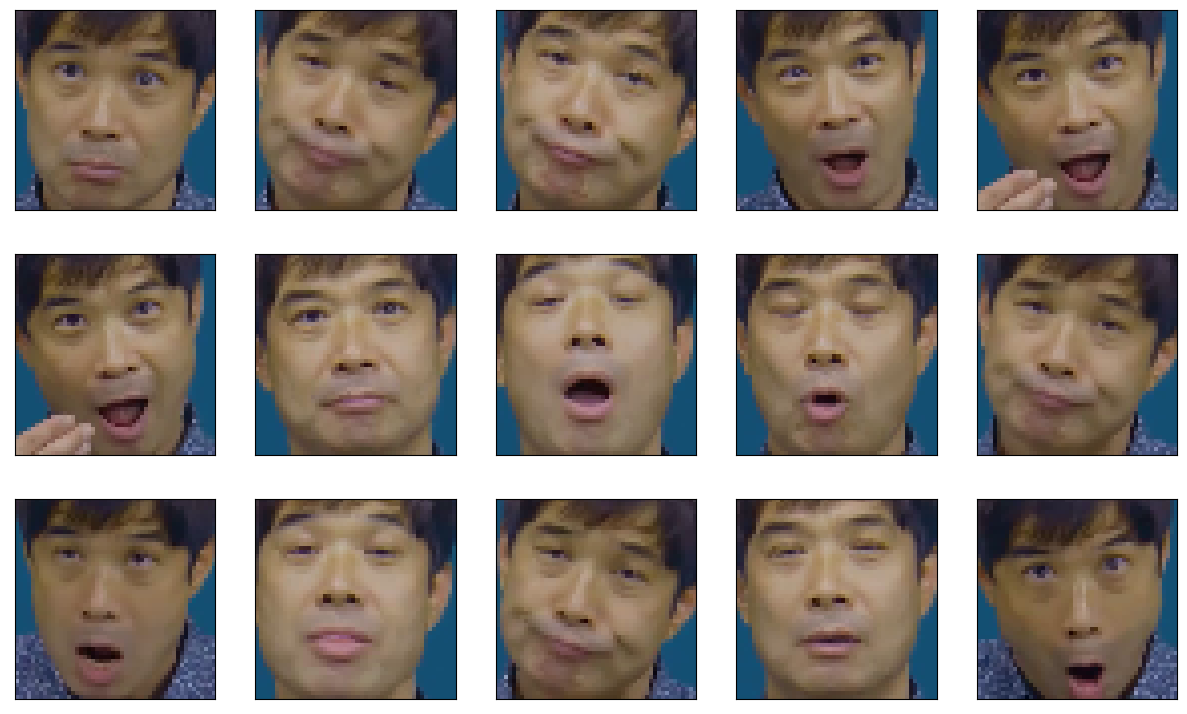

In [8]:
plt.figure(figsize=(15, 9))
for i in range(15):
    img_idx = np.random.randint(0, 174)
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[img_idx])

In [9]:
history = model.fit(train_img, train_labels, validation_split=0.2, epochs=100)

Epoch 1/100


2022-12-21 17:35:45.494548: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500


1/5 [=====>........................] - ETA: 5s - loss: 4.4953e-10 - acc: 1.0000

2022-12-21 17:35:45.794759: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-21 17:35:45.822444: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


5/5 [==============================] - 1s 27ms/step - loss: 1.1220e-10 - acc: 1.0000 - val_loss: 3.2945e-14 - val_acc: 1.0000
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 6.4171e-12 - acc: 1.0000 - val_loss: 7.9149e-15 - val_acc: 1.0000
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 1.7639e-12 - acc: 1.0000 - val_loss: 3.3499e-15 - val_acc: 1.0000
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 7.8248e-13 - acc: 1.0000 - val_loss: 1.9529e-15 - val_acc: 1.0000
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 4.9244e-13 - acc: 1.0000 - val_loss: 1.3806e-15 - val_acc: 1.0000
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 3.4305e-13 - acc: 1.0000 - val_loss: 1.1033e-15 - val_acc: 1.0000
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 2.7687e-13 - acc: 1.0000 - val_loss: 9.5255e-16 - val_acc: 1.0000
Epoch 8/100
5/5 [==============================] - 0

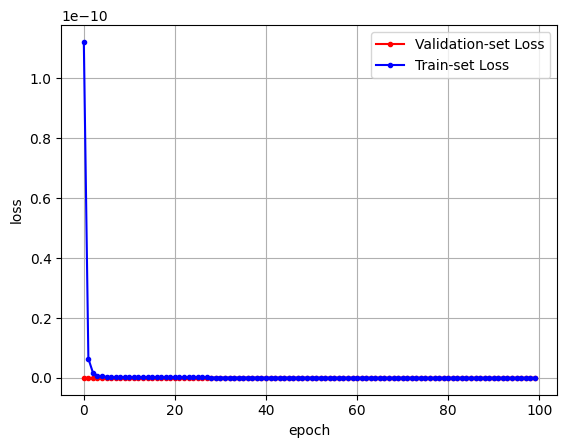

In [10]:
y_val_loss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_val_loss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [11]:
model.evaluate(test_img, test_labels)

2/2 [==============================] - 0s 1ms/step - loss: 1.7815e-11 - acc: 1.0000


[1.781461783645355e-11, 1.0]